<a href="https://colab.research.google.com/github/nitesh-singh-datascience/team-power-telecom-churn-analysis/blob/Nilanjan/Nilanjan_Chandra_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
#Import package
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
working_dir_path= '/content/drive/MyDrive/AlmaBetter/Colab Notebooks/AlmaBetter/Module 1 Python for data science/Week6 First Capstone Project/Data/'
df=pd.read_csv(working_dir_path + '/Telecom Churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df.groupby('Churn')['Total day calls'].median()

Churn
False    100
True     103
Name: Total day calls, dtype: int64

In [ ]:
df.groupby(['Area code','Churn'],as_index=True).agg({'Churn':"count"})

Churn
Area code Churn       
408       False    716
          True     122
415       False   1419
          True     236
510       False    715
          True     125

In [ ]:
#To check dependency on State
df.groupby(['State','Churn'],as_index=True).agg({'Churn':"count"})

In [ ]:
statedata=df.groupby(['State','Churn'],as_index= True)['Churn'].count().unstack()
statedata

Churn,False,True
State,,
AK,49,3
AL,72,8
AR,44,11
AZ,60,4
CA,25,9
CO,57,9
CT,62,12
DC,49,5
DE,52,9


In [ ]:
statedata['Churn ratio']=statedata[True]/(statedata[False]+statedata[True])
statedata.sort_values(by='Churn ratio', ascending=False)

Churn,False,True,Churn ratio
State,,,
NJ,50,18,0.264706
CA,25,9,0.264706
TX,54,18,0.250000
MD,53,17,0.242857
SC,46,14,0.233333
MI,57,16,0.219178
MS,51,14,0.215385
NV,52,14,0.212121
WA,52,14,0.212121


In [ ]:
#To check in which states , the atttrition ratio is highrer than the average

higherattritionstate=statedata[statedata['Churn ratio']>statedata['Churn ratio'].mean()]
higherattritionstate.sort_values(by='Churn ratio', ascending=False)

Churn,False,True,Churn ratio
State,,,
NJ,50,18,0.264706
CA,25,9,0.264706
TX,54,18,0.250000
MD,53,17,0.242857
SC,46,14,0.233333
MI,57,16,0.219178
MS,51,14,0.215385
NV,52,14,0.212121
WA,52,14,0.212121


In [6]:
from datetime import datetime

# Importing matplotlib.pyplot 
import matplotlib.pyplot as plt
%matplotlib inline


#plt.title('')
#plt.ylabel('')
#plt.xlabel('')

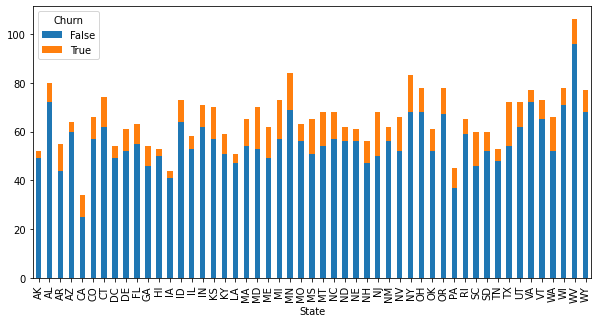

In [ ]:
data.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = (20, 5)

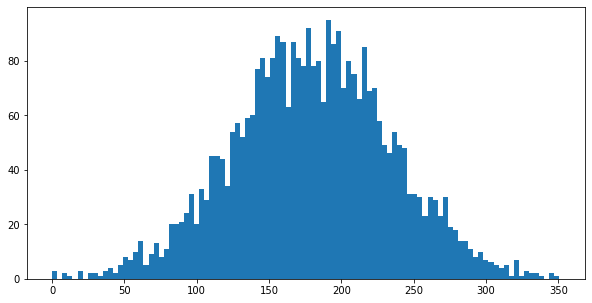

In [ ]:
#To understand how variables are distributed

plt.hist(df['Total day minutes'], bins = 100)

plt.show()

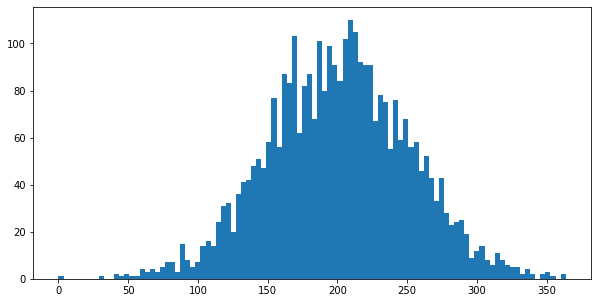

In [ ]:
plt.hist(df['Total eve minutes'], bins = 100)

plt.show()

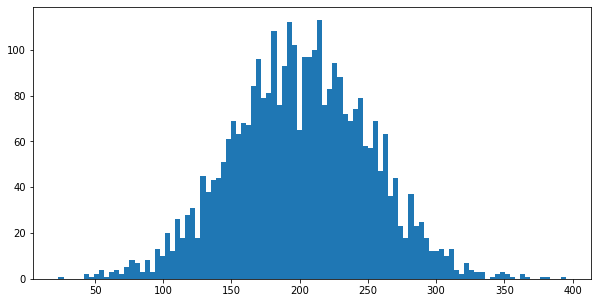

In [ ]:
plt.hist(df['Total night minutes'], bins = 100)

plt.show()

In [ ]:
#dependency on Customer service calls
data1=df.groupby(['Customer service calls','Churn'],as_index= True)['Churn'].count().unstack()
data1

Churn,False,True
Customer service calls,,
0,605.0,92.0
1,1059.0,122.0
2,672.0,87.0
3,385.0,44.0
4,90.0,76.0
5,26.0,40.0
6,8.0,14.0
7,4.0,5.0
8,1.0,1.0


In [ ]:
data2=pd.DataFrame(data1)

In [ ]:
def ratiochurn(a,b): 
  Churn_Ratio=a/(b+a)
  return Churn_Ratio

In [ ]:
data2['Churn Ratio'] = data2.apply(lambda x: ratiochurn(x[True], x[False]),axis=1)
data2[False]=data2[False].fillna(0)
data2

Churn,False,True,Churn Ratio
Customer service calls,,,
0,605.0,92.0,0.131994
1,1059.0,122.0,0.103302
2,672.0,87.0,0.114625
3,385.0,44.0,0.102564
4,90.0,76.0,0.457831
5,26.0,40.0,0.606061
6,8.0,14.0,0.636364
7,4.0,5.0,0.555556
8,1.0,1.0,0.500000


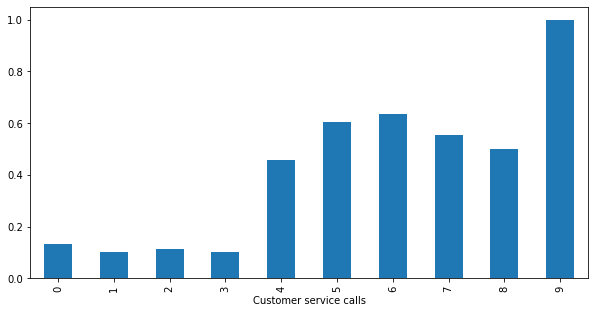

In [ ]:
data3=data2['Churn Ratio']
data3.plot(kind='bar')
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
#Dependency on International Plan
Intl_plan=df.groupby(['International plan','Churn'],as_index= True)['Churn'].count().unstack()
Intl_plan

Churn,False,True
International plan,,
No,2664,346
Yes,186,137


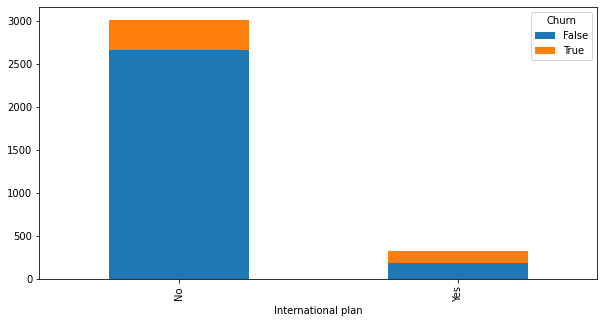

In [ ]:
Intl_plan.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
Intl_plan['Churn ratio']=Intl_plan[True]/(Intl_plan[False]+Intl_plan[True])

In [ ]:
Intl_plan

Churn,False,True,Churn ratio
International plan,,,
No,2664,346,0.114950
Yes,186,137,0.424149


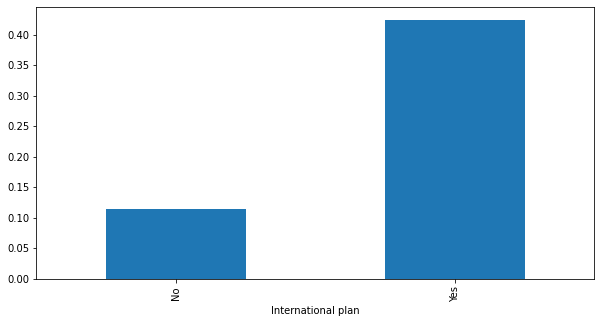

In [ ]:
data4=Intl_plan['Churn ratio']
data4.plot(kind='bar')
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
#Dependency on Voice mail plan
Voicemail=df.groupby(['Voice mail plan','Churn'],as_index= True)['Churn'].count().unstack()
Voicemail

Churn,False,True
Voice mail plan,,
No,2008,403
Yes,842,80


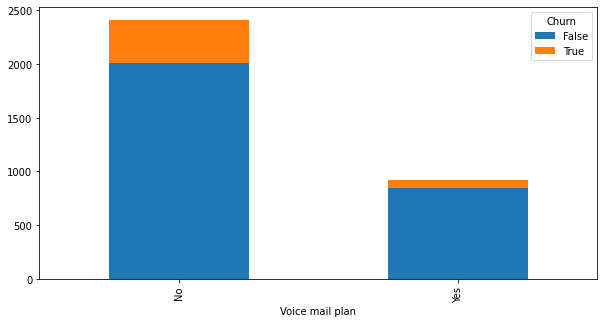

In [ ]:
Voicemail.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
#Dependency on Area Code
Area=df.groupby(['Area code','Churn'],as_index= True)['Churn'].count().unstack()
Area

Churn,False,True
Area code,,
408,716,122
415,1419,236
510,715,125


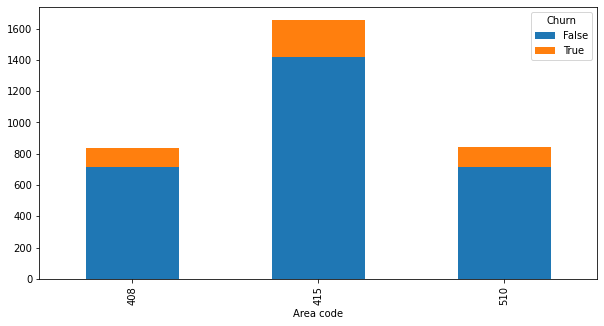

In [ ]:
Area.plot.bar(stacked=True)
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
Area['Churn ratio']=Area[True]/(Area[False]+Area[True])

In [ ]:
Area

Churn,False,True,Churn ratio
Area code,,,
408,716,122,0.145585
415,1419,236,0.142598
510,715,125,0.148810


In [ ]:
#To check correlation between the variables
corr_df =df.corr()
corr_df




,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


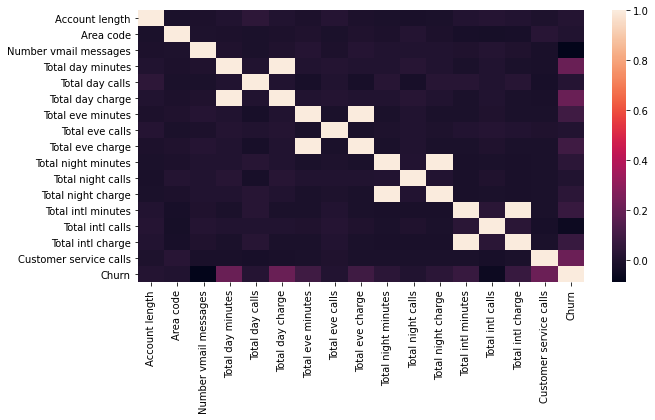

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)

In [ ]:
#Dependency on total day calls vs Churn via box plot

Text(0, 0.5, 'Total Day Calls')

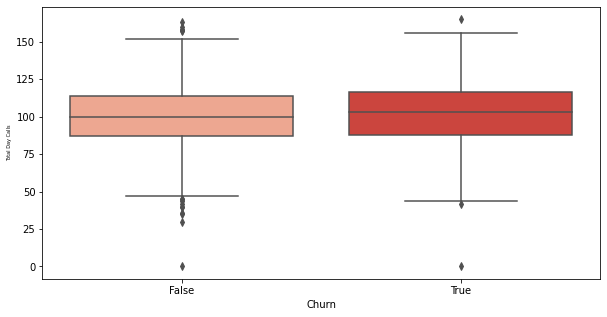

In [13]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='Churn', y = 'Total day calls',palette = "Reds")
plt.ylabel('Total Day Calls', fontsize = 5)

Text(0, 0.5, 'Total Eve Calls')

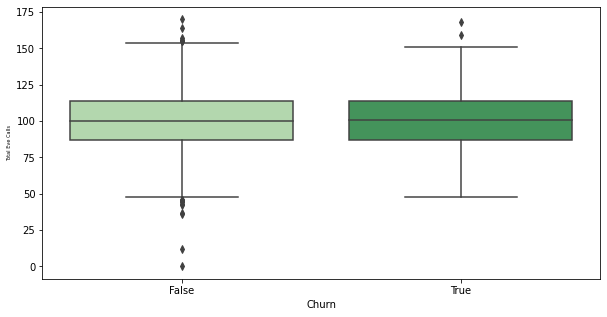

In [15]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='Churn', y = 'Total eve calls',palette = "Greens")
plt.ylabel('Total Eve Calls', fontsize = 5)

Text(0, 0.5, 'Total Eve Calls')

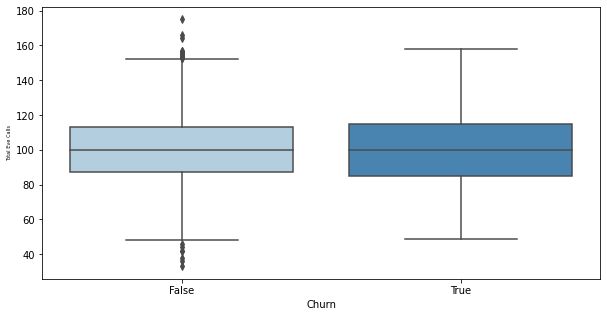

In [16]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='Churn', y = 'Total night calls',palette = "Blues")
plt.ylabel('Total Eve Calls', fontsize = 5)

Text(0, 0.5, 'Total International Calls')

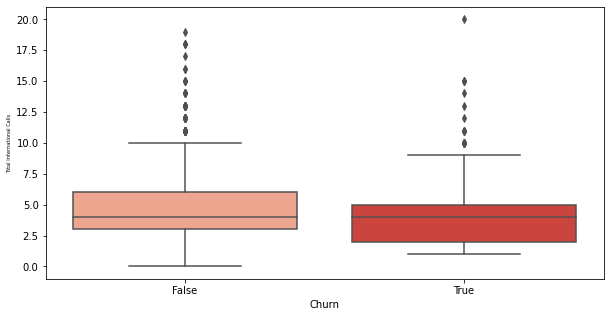

In [20]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='Churn', y = 'Total intl calls',palette = "Reds")
plt.ylabel('Total International Calls', fontsize = 5)